In [246]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_style('white')

In [247]:
songs = pd.read_csv("/Users/kashishsharma/Documents/GitHub/sose2020-DS_project_final_kashish/nonbool-spotify.csv")

In [248]:
songs.head()

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity
0,0,The Weeknd,Blinding Lights,1,1,31,0VjIjW4GlUZAMYd2vXMi3b,0.0,99
1,1,SAINt JHN,Roses,4,1,15,7fPuWrlpwDcHm5aHCH5D9t,1.0,85
2,2,Harry Styles,Watermelon Sugar,8,2,15,6UelLqGlWMcVH1E5c4H7lY,0.0,94
3,3,Lil Mosey,Blueberry Faygo,9,2,21,6wJYhPfqk3KGhHRG76WzOh,1.0,91
4,4,Harry Styles,Adore You,6,2,30,3jjujdWJ72nww5eGnfs2E7,0.0,88


In [249]:
# from sklearn import preprocessing
# peak_position = songs[['peak_position']].values
# min_max_scaler = preprocessing.MinMaxScaler()
# peak_position_scaled = min_max_scaler.fit_transform(peak_position)
# songs['peak_position'] = pd.DataFrame(peak_position_scaled)

In [250]:
songs_features = songs.copy()
songs_features = songs_features.drop(['track','artist','spotify_id', 'spotify_popularity','spotify_popularity', 'peak_position_grouped','explicit', 'weeks_in_charts'],axis=1)

In [251]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [252]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6128221787150351)
For n_clusters = 3, silhouette score is 0.5636876520999119)
For n_clusters = 4, silhouette score is 0.5306580876071832)
For n_clusters = 5, silhouette score is 0.504062151256582)
For n_clusters = 6, silhouette score is 0.4810616323313122)
For n_clusters = 7, silhouette score is 0.46207786999800227)
For n_clusters = 8, silhouette score is 0.4417930719458074)
For n_clusters = 9, silhouette score is 0.4270161139660679)


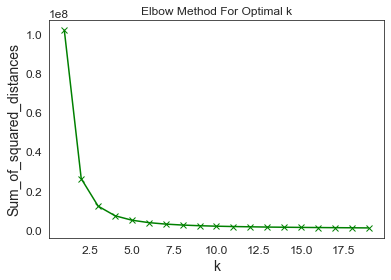

In [253]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [254]:
kmeans = KMeans(n_clusters=4) # the optimal is at 2 but for the purpose of explanation we have used the value 4
kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [255]:
# PCA

from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


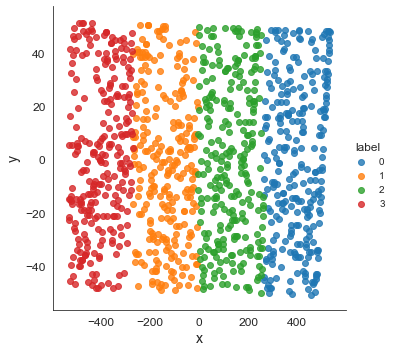

In [256]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [257]:
pca.explained_variance_ratio_

array([0.99126841, 0.00873159])

In [258]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      Unnamed: 0  peak_position
PC-1   -0.999995      -0.003108
PC-2    0.003108      -0.999995


In [259]:
songs['label'] = y_kmeans
songs = songs.sample(frac=1)
songs['label'].value_counts()

0    271
2    268
1    265
3    262
Name: label, dtype: int64

In [260]:
songs[songs['label'] == 0].tail(20)

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
130,130,Lil Uzi Vert,Myron,13,3,7,56uXDJRCuoS7abX3SkzHKQ,1.0,84,0
207,207,Lil Uzi Vert,Secure The Bag,72,15,1,7gHZGXSJzM29WA384suYY2,1.0,64,0
98,98,Future,One Of My,82,17,1,12ZpiGAd2uPgJiofgoZMue,1.0,66,0
232,232,BTS,My Time,84,17,1,4vTgx6h4seHvkuFh84JXYP,0.0,76,0
8,8,Maren Morris,The Bones,12,3,41,7yFhA2fUsL2oIMWlw5DaHQ,0.0,76,0
159,159,Rod Wave,I Remember,77,16,1,5B47BFhAuIzJ6ZwxZPVI1i,1.0,61,0
36,36,Don Toliver,After Party,57,12,11,527k23H0A4Q0UJN3vGs0Da,1.0,89,0
253,253,Niall Horan,No Judgement,97,20,1,5IUOU5xkzGHsRFOYNu3GSK,0.0,76,0
262,262,Lil Nas X,Panini,5,1,32,4SDgTLDYrJ2UrHbkRkg7MD,0.0,79,0
150,150,Lil Uzi Vert,P2,11,3,6,3kW4z2pIj5VY5fLjBrMRL5,1.0,83,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f44787d0>,
      dtype=object)

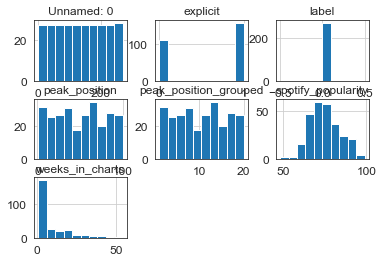

In [261]:
songs[songs['label']==0].hist()

In [262]:
songs[songs['label']==1].head(20)

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
739,739,Avril Lavigne,Head Above Water,64,13,2,7gY3cyGcB2wnk2xDXiA0pe,0.0,71,1
788,788,Travis Scott,R.I.P Screw,26,6,2,4SZepBIPDRwPaHIjAKwRDb,1.0,72,1
590,590,Offset,Red Room,49,10,3,4TWflhgevIGo448fWc6mQq,1.0,66,1
732,732,Lil Wayne,Took His Time,65,13,1,1Dk3CfJEtqvj7Xg2AWwfEn,1.0,54,1
589,589,Midland,Burn Out,63,13,9,7yrJnekdlwWARt5lmVqJ6L,0.0,63,1
593,593,Lukas Graham,Love Someone,70,14,10,2JqnpexlO9dmvjUMCaLCLJ,0.0,74,1
787,787,Travis Scott,Stop Trying To Be God,27,6,2,1xYpVRspgaLxdJLOTQkTjg,1.0,73,1
614,614,Kacey Musgraves,Rainbow,98,20,1,79qxwHypONUt3AFq0WPpT9,0.0,72,1
747,747,Dylan Scott,Hooked,48,10,11,3DV49ruvI5Sl6iisPZAc2c,0.0,66,1
683,683,Queen,Bohemian Rhapsody,2,1,44,7tFiyTwD0nx5a1eklYtX2J,0.0,75,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f699e550>,
      dtype=object)

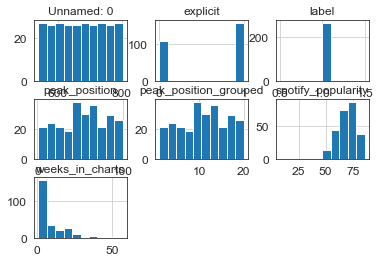

In [263]:
songs[songs['label']==1].hist()

In [264]:
songs[songs['label']==2].head(20)

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
494,494,Kane Brown,Good As You,36,8,20,19kUPdKTp85q9RZNwaXM15,0.0,73,2
478,478,NF,The Search,70,14,2,2OKo7g3KfmCt3kyLvUAL0g,0.0,72,2
358,358,Miranda Lambert,It All Comes Out In The Wash,70,14,2,41FLEFSeRCv19OBn0vLiaH,0.0,61,2
502,502,Drake,Omerta,35,7,2,3kCwyvhvVTyehIzYN2I0nF,1.0,62,2
294,294,Ant Saunders,Yellow Hearts,81,17,8,2W4yABdLc4Jnds67Poi5Nl,0.0,80,2
297,297,Doja Cat,Candy,86,18,6,1VJwtWR6z7SpZRwipI12be,1.0,77,2
438,438,Lil Tecca,Love Me,97,20,1,4e0FYxSROat25pH16zMTZI,1.0,78,2
418,418,Luke Combs & Brooks & Dunn,"1, 2 Many",97,20,1,226le7T3p82reYWzsi9Hsz,0.0,72,2
350,350,YoungBoy Never Broke Again,Lonely Child,44,9,7,6xqZi5JTTk6XIMLvy7w5JJ,1.0,65,2
342,342,Panic! At The Disco,Into The Unknown,98,20,2,421eObjg0DTm2qajJl5OJm,0.0,75,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f6e6d390>,
      dtype=object)

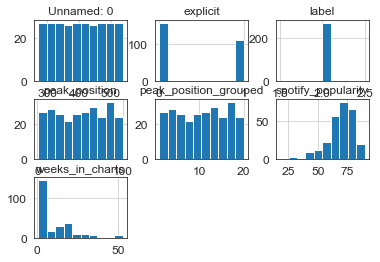

In [265]:
songs[songs['label']==2].hist()

In [266]:
songs[songs['label']==3].head(20)

,Unnamed: 0,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
969,969,Janelle Monae,Make Me Feel,99,20,1,5gW5dSy3vXJxgzma4rQuzH,1.0,66,3
930,930,SZA,Broken Clocks,82,17,4,2fXwCWkh6YG5zU1IyvQrbs,1.0,72,3
1004,1004,"Farruko, Nicki Minaj, Bad Bunny, 21 Savage & R...",Krippy Kush,75,15,6,038kavjqUaGIYZL5lYocvX,1.0,55,3
870,870,Jordan Davis,Singles You Up,50,10,19,4LiMQ6G9n84rDUBs9wtwz6,0.0,72,3
809,809,Queen Naija,Karma,63,13,2,3qmm9AdG0TnShv0drgXNIQ,0.0,65,3
1018,1018,Huncho Jack,Huncho Jack,87,18,1,5vuiHi3QYbwcm1OKJOYnrf,1.0,58,3
984,984,Drake,Diplomatic Immunity,7,2,3,4haJoBPbPj9QFKNpp9e8kx,1.0,55,3
1021,1021,Addison Agen,Tennessee Rain,67,14,1,54p39OJ544KF6iFeCzbVjs,0.0,37,3
961,961,"ScHoolboy Q, 2 Chainz & Saudi",X,49,10,5,4LmAnpjlhWTahvRkYR8xJa,1.0,69,3
844,844,Kane Brown,Heaven,15,3,27,1HXy5I3HTWq8OvxCn0z7G7,0.0,77,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f71e3850>,
      dtype=object)

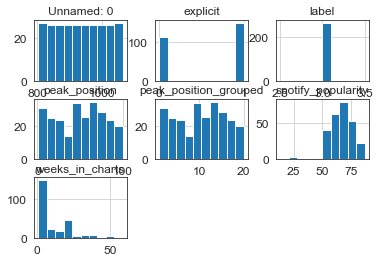

In [267]:
songs[songs['label']==3].hist()

In [268]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [269]:
y_pred = rfc.predict(X_test)    

In [271]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [272]:
# GENRE definntions

definitions = ['Pop/Hip-Hop','Rock/Country','Country','Hip-Hop/Rap']

In [273]:
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('Unnamed: 0', 0.9615400766120382), ('peak_position', 0.03845992338796188)]

In [274]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [275]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[93  0  0  0]
 [ 0 87  3  1]
 [ 2  2 81  0]
 [ 0  0  0 83]]


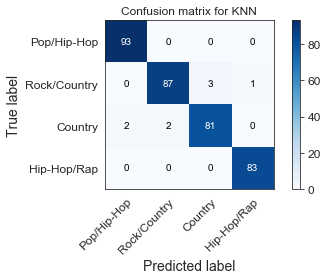

In [276]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [277]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

 Pop/Hip-Hop       0.98      1.00      0.99        93
Rock/Country       0.98      0.96      0.97        91
     Country       0.96      0.95      0.96        85
 Hip-Hop/Rap       0.99      1.00      0.99        83

    accuracy                           0.98       352
   macro avg       0.98      0.98      0.98       352
weighted avg       0.98      0.98      0.98       352
KNN


In [281]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

 Pop/Hip-Hop       1.00      1.00      1.00        93
Rock/Country       1.00      0.98      0.99        91
     Country       0.98      1.00      0.99        85
 Hip-Hop/Rap       1.00      1.00      1.00        83

    accuracy                           0.99       352
   macro avg       0.99      0.99      0.99       352
weighted avg       0.99      0.99      0.99       352
forest
